importa bibliotecas (NumPy, CIFAR-10, transforms, PCA, RandomForest e métricas) e define load_cifar10(), que carrega o dataset, normaliza (e achata) imagens, retornando X_train, X_test, y_train, y_test.

In [2]:
import numpy as np
from torchvision.datasets import CIFAR10
from torchvision import transforms
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


def load_cifar10(flatten: bool = True):
    tfm = transforms.ToTensor()
    train = CIFAR10(root="data", train=True, download=True, transform=tfm)
    test = CIFAR10(root="data", train=False, download=True, transform=tfm)

    x_train = train.data.reshape(len(train), -1) / 255.0 if flatten else train.data
    x_test = test.data.reshape(len(test), -1) / 255.0 if flatten else test.data
    y_train = np.array(train.targets)
    y_test = np.array(test.targets)
    return x_train, x_test, y_train, y_test





usa load_cifar10(), reduz dimensionalidade com PCA (95% variância), treina RandomForestClassifier (300 árvores), calcula e imprime a acurácia no conjunto de teste.

Cada imagem vira um vetor 1D de pixels (3072 dimensões: 32×32×3), normalizado e   reduzido por PCA, e é passada como uma linha de X

Cada linha de X é um vetor de características que a árvore consome nó a nó, comparando valores de pixel (ou componentes PCA) a thresholds até chegar a uma folha.

In [3]:
%%time

x_train, x_test, y_train, y_test = load_cifar10()

pca = PCA(n_components=0.95, svd_solver="full", random_state=42)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

clf = RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        n_jobs=-1,
        random_state=42,
    verbose=1,
    )

clf.fit(x_train, y_train)

acc = accuracy_score(y_test, clf.predict(x_test))
print(f"Accuracy: {acc:.2%}")




100%|██████████| 170M/170M [00:15<00:00, 11.2MB/s] 
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s


Accuracy: 47.36%
CPU times: user 10min 29s, sys: 4.01 s, total: 10min 33s
Wall time: 3min 6s


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.4s finished


extrai a árvore de índice 0 do forest e plota até profundidade 3 com tree.plot_tree, mostrando nós coloridos e nomes de classes.

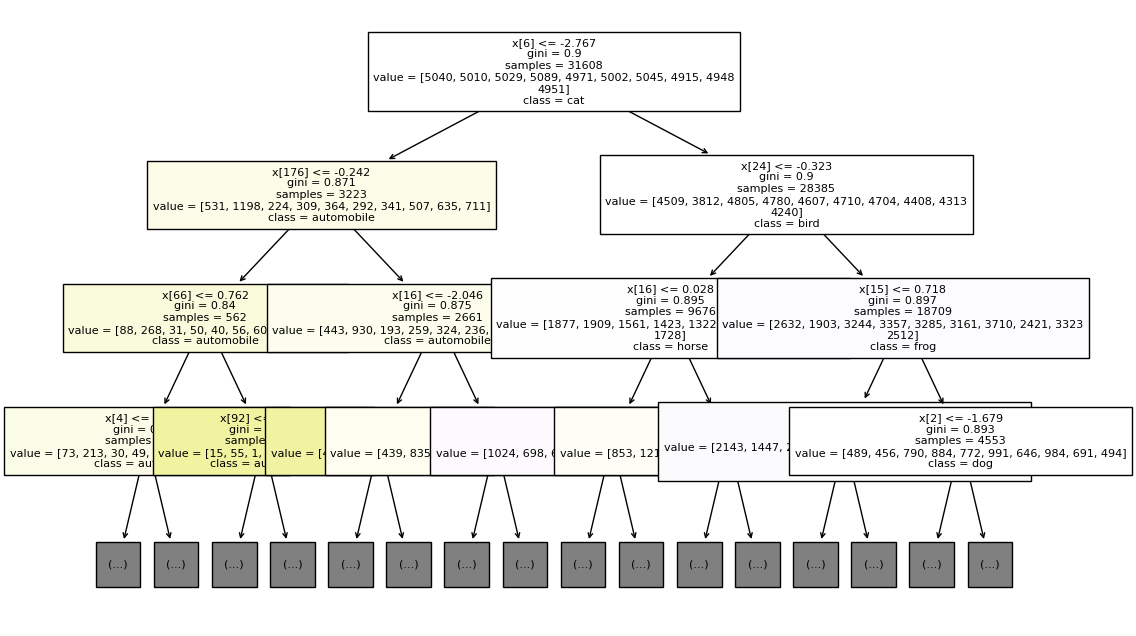

In [18]:
from sklearn import tree
import matplotlib.pyplot as plt

# pegue uma das árvores do forest
arvore_idx = 0
árvore = clf.estimators_[arvore_idx]


plt.figure(figsize=(12, 8))
tree.plot_tree(
    árvore,
    max_depth=3,
    filled=True,
    class_names=classes,
    fontsize=8
)
plt.axis("off")
plt.show()


para a amostra idx=10, transforma via PCA, prevê classe, carrega a imagem PIL original, e exibe com título “Pred: <classe> | True: <classe>”.

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished


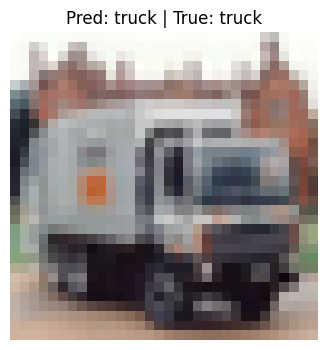

In [16]:
idx = 10

sample_pca = x_test[idx].reshape(1, -1)

pred = clf.predict(sample_pca)[0]
classes = CIFAR10(root="data", train=False, download=False).classes

dataset = CIFAR10(root="data", train=False, download=False, transform=None)
img_pil, _ = dataset[idx]

plt.figure(figsize=(4,4))
plt.imshow(img_pil)
plt.title(f"Pred: {classes[pred]} | True: {classes[y_test[idx]]}")
plt.axis('off')
plt.show()

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished


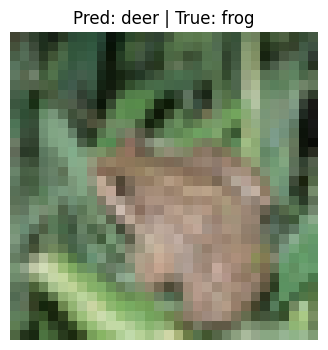

In [25]:
idx = 4

sample_pca = x_test[idx].reshape(1, -1)

pred = clf.predict(sample_pca)[0]
classes = CIFAR10(root="data", train=False, download=False).classes

dataset = CIFAR10(root="data", train=False, download=False, transform=None)
img_pil, _ = dataset[idx]

plt.figure(figsize=(4,4))
plt.imshow(img_pil)
plt.title(f"Pred: {classes[pred]} | True: {classes[y_test[idx]]}")
plt.axis('off')
plt.show()